# Exploring Musical Trends and Popularity Patterns across Spotify Genres
## Jessica Baumann, Mary Hillmer, Sophia Shull
### DS4200, Fall 2025, Dr. Yang

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in csv files
high_pop_df = pd.read_csv('data/high_popularity_spotify_data.csv')
low_pop_df = pd.read_csv('data/low_popularity_spotify_data.csv')

In [25]:
# high popularity data head (same structure across both datasets)
high_pop_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [26]:
# align the columns
high_pop_df.columns = high_pop_df.columns.str.strip()
low_pop_df = low_pop_df.reindex(columns=high_pop_df.columns)

# create a binary column to indicate popularity (1 for high popularity, 0 for low popularity)
high_pop_df['popularity_label'] = 1
low_pop_df['popularity_label'] = 0 

# concat the two dfs into one combined df with all of the data
combined_df = pd.concat([high_pop_df, low_pop_df], ignore_index=True)

# drop irrelevant columns (id columns)
combined_df = combined_df.drop(['track_album_id', 'id', 'playlist_id', 'type'], axis=1)
combined_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_id,track_name,track_album_release_date,instrumentalness,mode,key,duration_ms,acousticness,playlist_subgenre,popularity_label
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,0.0,6.0,251668.0,0.3080,mainstream,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,1.0,2.0,210373.0,0.2000,mainstream,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,1.0,1.0,166300.0,0.2140,mainstream,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,0.0,0.0,157280.0,0.0939,mainstream,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,0.0,0.0,169917.0,0.0283,mainstream,1


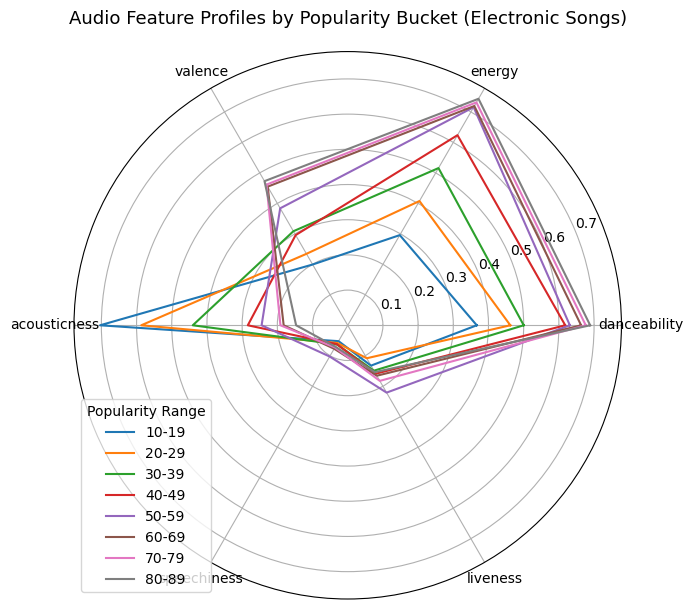

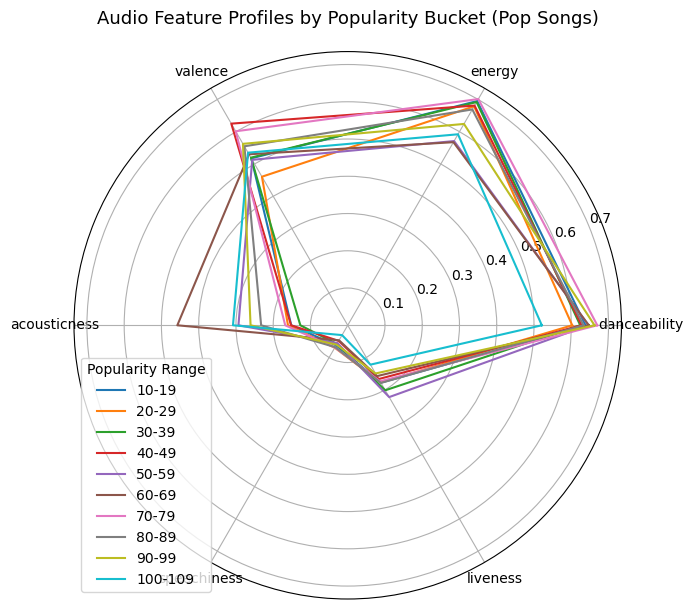

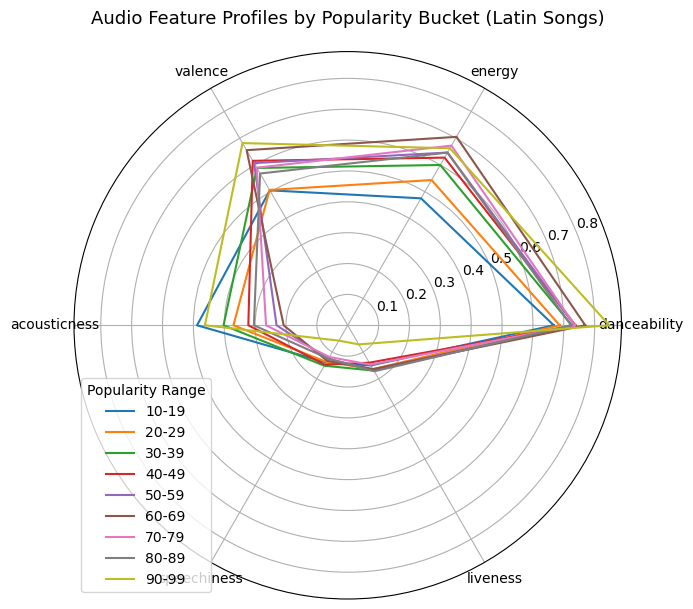

In [44]:
# create popularity buckets (0–9, 10–19, ... for easier visualization)
# each bucket represents a range of 10 popularity points, math is just to floor to nearest 10
combined_df["popularity_bucket"] = ((combined_df["track_popularity"] // 10) * 10).astype(int)

# choose features to visualize
features = ["danceability", "energy", "valence", "acousticness", "speechiness", "liveness"]

# get top 3 genres present for now, can add more later or add field for user to select on dash
top_genres = (
    combined_df["playlist_genre"]
    .value_counts()
    .nlargest(3)
    .index
)

# loop through each genre and plot radar chart for each
for genre in top_genres:
    genre_data = (
        combined_df[combined_df["playlist_genre"] == genre]
        .groupby("popularity_bucket")[features]
        .mean()
    )

    # setup radar chart parameters
    categories = list(genre_data.columns)
    N = len(categories)
    # compute angle for each axis, ranges from 0 -> 2pi
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # using polar coords for radar chart
    fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
    
    # plot each popularity bucket, color-coded (need to check color palettes for accessibility later)
    for bucket in genre_data.index:
        values = genre_data.loc[bucket].tolist()
        values += values[:1]
        ax.plot(angles, values, label=f"{bucket}-{bucket+9}", linewidth=1.5)
    
    # labels and styling 
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    # set title that updates based on genre chosen
    ax.set_title(f"Audio Feature Profiles by Popularity Bucket ({genre.title()} Songs)", size=13, pad=20)
    ax.legend(loc="lower left", title="Popularity Range")

    plt.tight_layout()
    plt.show()